Basic Statistics:
       weight  height    bmi  fatRate  bodyWaterRate  boneMass  metabolism  \
count  103.00  103.00 103.00    73.00          73.00     73.00       73.00   
mean   104.43  185.00  30.47    31.32          49.03      3.63     2036.23   
std      3.93    0.00   1.15     1.34           0.95      0.07       58.24   
min     97.40  185.00  28.40    29.39          47.81      3.51     1944.00   
25%     99.80  185.00  29.10    29.88          48.14      3.55     1974.00   
50%    106.60  185.00  31.10    32.03          48.53      3.65     2061.00   
75%    107.50  185.00  31.40    32.57          50.07      3.69     2088.00   
max    109.00  185.00  31.80    33.05          50.41      3.73     2115.00   

       muscleRate  visceralFat  lean_body_mass  muscle_fat_ratio  ffmi  
count       73.00        73.00           73.00             73.00 73.00  
mean        67.44        12.16           71.07              2.16 20.77  
std          1.25         0.47            1.32              

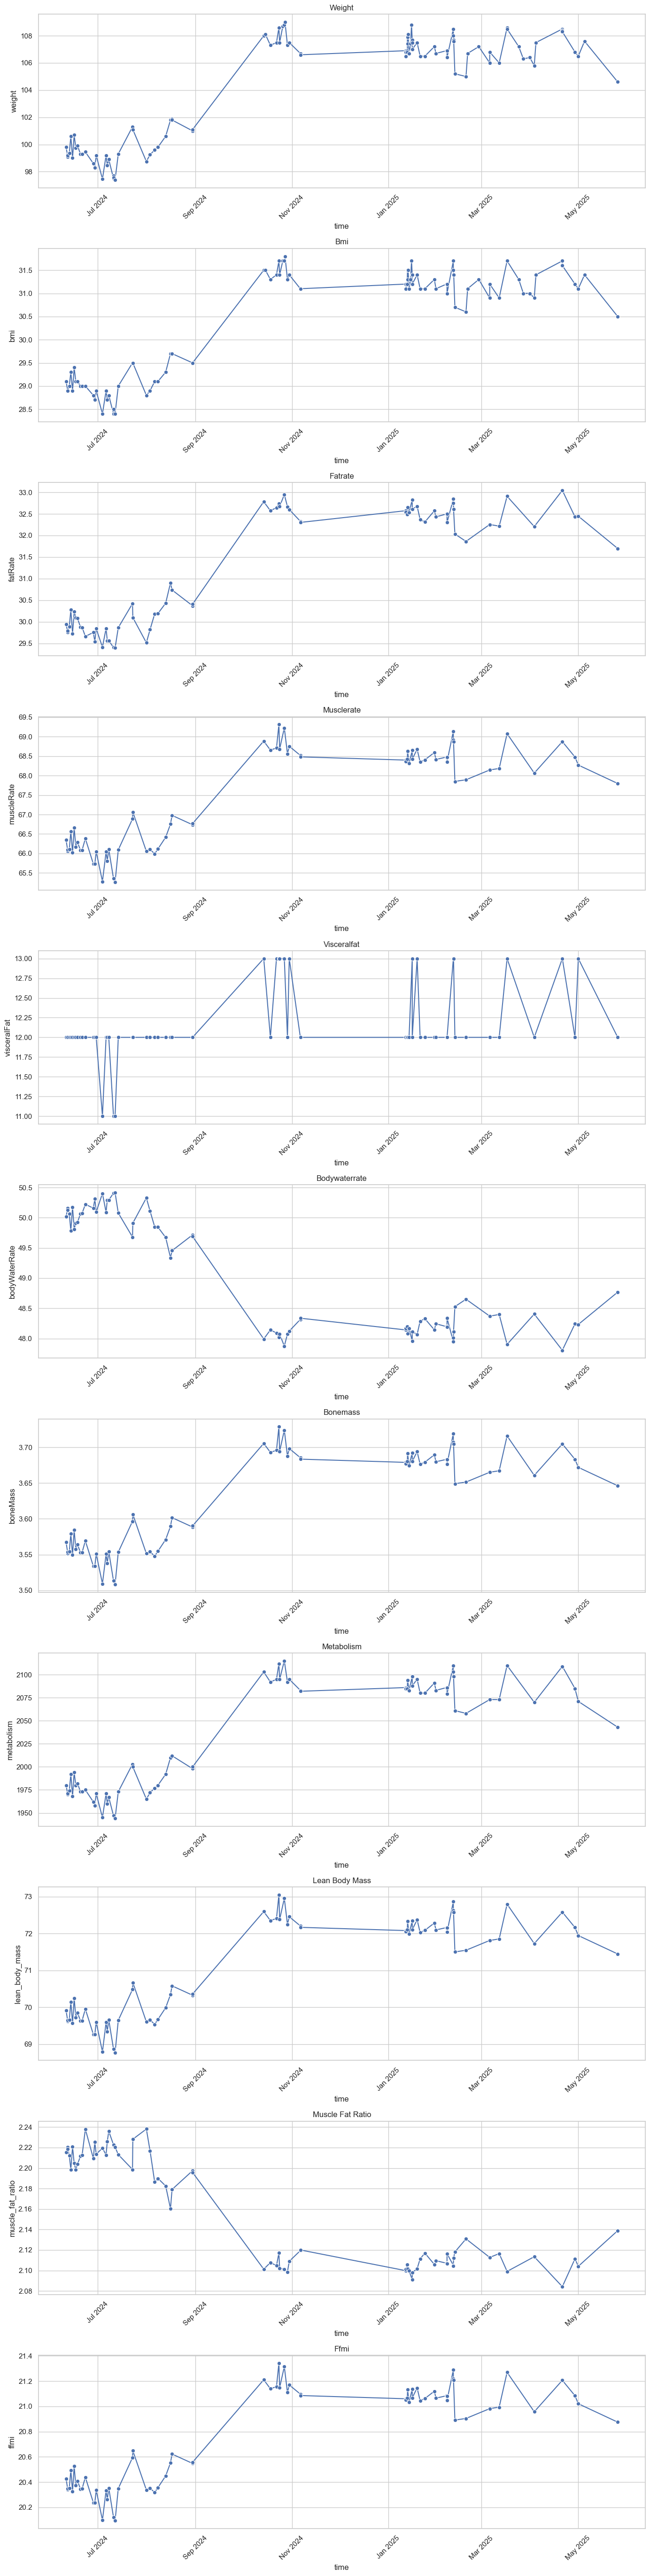

In [48]:
"""
Anthropometric Data Analysis Script

This script:
- Loads body composition data from a CSV file
- Converts timestamps to datetime format
- Calculates additional metrics (Lean Body Mass, Muscle-Fat Ratio, FFMI)
- Displays basic statistical summaries
- Plots time-series trends for key body composition metrics
"""

# ----------------------
# 1. Import dependencies
# ----------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------
# 2. Set visual styles
# ----------------------
sns.set(style="whitegrid")  # Apply Seaborn whitegrid style for clean plots
pd.options.display.float_format = '{:.2f}'.format  # Format float output for readability

# ----------------------
# 3. Load and prepare data
# ----------------------
df = pd.read_csv('body_data.csv')  # Load dataset

# Convert 'time' column to datetime type for proper time-based analysis
df['time'] = pd.to_datetime(df['time'])

# Sort by timestamp to ensure chronological order
df = df.sort_values(by='time').reset_index(drop=True)

# ----------------------
# 4. Add derived metrics
# ----------------------

# Lean Body Mass: weight without fat
df['lean_body_mass'] = df['weight'] * (1 - df['fatRate'] / 100)

# Muscle-Fat Ratio: indicator of body composition efficiency
df['muscle_fat_ratio'] = df['muscleRate'] / df['fatRate']

# Fat-Free Mass Index (FFMI): lean mass normalized by height
df['ffmi'] = df['lean_body_mass'] / (df['height'] / 100) ** 2

# ----------------------
# 5. Display summary statistics
# ----------------------
print("Basic Statistics:")
print(df.describe())

# ----------------------
# 6. Define metrics for visualization
# ----------------------
metrics = [
    'weight', 'bmi', 'fatRate', 'muscleRate', 'visceralFat',
    'bodyWaterRate', 'boneMass', 'metabolism', 'lean_body_mass',
    'muscle_fat_ratio', 'ffmi'
]

# ----------------------
# 7. Plot time-series graphs
# ----------------------
plt.figure(figsize=(14, len(metrics)*5))  # Set canvas size for subplots

for i, col in enumerate(metrics):
    plt.subplot(len(metrics), 1, i + 1)  # Create subplot
    sns.lineplot(x='time', y=col, data=df, marker='o')  # Line plot with markers
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2)) 
    plt.title(col.replace('_', ' ').title())  # Format title
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()  # Display all plots

🧬 Body Composition Analysis Report
📊 Overview
This report presents an in-depth analysis of body composition metrics collected between June 2024 and May 2025 . The subject is a male with a constant height of 185 cm , showing significant fluctuations in weight and body composition over time.

🔍 Key Metrics Tracked:
Weight : kg
BMI : Body Mass Index
Fat Rate : Body fat percentage
Muscle Rate : Skeletal muscle mass percentage
Visceral Fat : Level of internal abdominal fat (scale-based)
Body Water Rate : Total body water percentage
Bone Mass : Bone mineral content in kg
Metabolism : Basal Metabolic Rate (BMR) in kcal/day
Me also derived additional key indicators:
Lean Body Mass (LBM) : Muscle + organ mass
Muscle-Fat Ratio (MFR) : Indicator of body composition efficiency
FFMI (Fat-Free Mass Index) : Lean mass normalized by height

📈 Weight Trends
    June–August 2024  ~98–99 kg

    September–November 2024  ~107–109 kg

    December 2024–April 2025 ~105–108 kg

    May 2025 ~104.6 kg

📏 BMI & Health Risk
Range: 28.4 – 31.8
Average BMI: ~31.0 → Obesity Class I (WHO classification)
⚠️ Insight: Despite some weight loss, BMI remains consistently above 30, indicating moderate health risk , including cardiovascular disease and type 2 diabetes.

💪 Muscle Development
Initial Muscle Rate: ~65.2%
Peak Muscle Rate: ~69.3% (Oct–Nov 2024)
Current Muscle Rate: ~67.8%
✅ Insight: Significant increase in muscle mass indicates consistent strength training and good protein intake during bulking. Even during weight loss, muscle mass was preserved well.  

🧊 Body Fat
Initial Fat Rate: ~29.4%
Peak Fat Rate: ~33% (Oct–Nov 2024)
Current Fat Rate: ~31.7%
⚠️ Insight: For men, a healthy body fat range is 10–20% . Current levels are significantly elevated , indicating the need for further fat loss while preserving lean mass. 

🧠 Visceral Fat
Values: 11–13 (InBody scale)
Healthy Range: ≤ 10
⚠️ Insight: Elevated visceral fat increases the risk of: 
Cardiovascular diseases,Insulin resistance,Type 2 Diabetes,Inflammation and metabolic syndrome

💧 Hydration
Initial Body Water Rate: ~50.4%
Low Point: ~47.8% (Oct–Nov 2024)
Current Value: ~48.8%
📉 Insight: Hydration decreased during peak weight gain but improved slightly afterward. Maintaining hydration is important for metabolism and recovery. 

🔥 Basal Metabolic Rate (BMR)
Range: ~1940 – 2115 kcal/day
Correlates directly with body weight
✅ Insight: BMR increased with weight gain and slightly declined with weight loss — expected behavior. 

🦴 Bone Mass
Stable Range: ~3.5 – 3.7 kg
✅ Insight: No signs of bone mass loss — good indicator of overall skeletal health. 

🧮 Derived Metrics
1. Lean Body Mass (LBM)
Formula: Weight × (1 – FatRate / 100)
Increased until October 2024, then slightly declined
✅ Insight: LBM reflects muscle and organ mass. Its growth shows progress in training and nutrition. A decline suggests the need to adjust protein intake during cutting. 

2. Muscle-Fat Ratio (MFR)
Formula: MuscleRate / FatRate
Range: ~2.0 – 2.3
less than 1.5 = High fat, low muscle
1.5–2.5 = Healthy balance
more than 2.5  = Excellent ratio (common among athletes) 
 ✅ Insight: MFR of ~2.1 indicates a good muscle-fat balance , though there's room for improvement.

3.Fat-Free Mass Index (FFMI)
Formula: Lean Body Mass / (Height in meters)^2
Range: ~21.8 – 23.2
less than 19 = Low lean mass
19–21 = Normal
21–23 = High (typical for athletes)
more than 23 = Very high (could indicate steroid use without testing)
✅ Insight: FFMI of ~22.5 places the subject in the high-normal athlete range , suggesting natural muscular development without extreme interventions. 

🩺 Medical Insights & Recommendations
✅ Positive Signs:
Good muscle development indicates consistent training
FFMI within natural athlete range
Bone mass remains stable
Hydration improved over time
⚠️ Areas of Concern:
BMI and fat percentage remain in unhealthy ranges
Visceral fat level is consistently elevated — increased health risks
After November 2024, muscle mass declined faster than fat — may suggest inadequate protein or caloric intake
🛠 Suggested Actions
💪 Training:
Continue strength training to preserve muscle
Add cardio or HIIT sessions to accelerate fat loss
🍽 Nutrition:
Monitor caloric intake: aim for mild deficit with adequate protein (1.6–2.2 g/kg BW)
Stay hydrated: aim for ~3 liters of water per day
🧘 Lifestyle:
Prioritize sleep and stress management
Consider regular blood work (lipid panel, glucose, insulin, liver function)